Input the measured inclination: 0.835
Input the measured SNR: 18
Input the normalisation factor (value between 0 and 1, if unknown, submit 0.5): 0.75


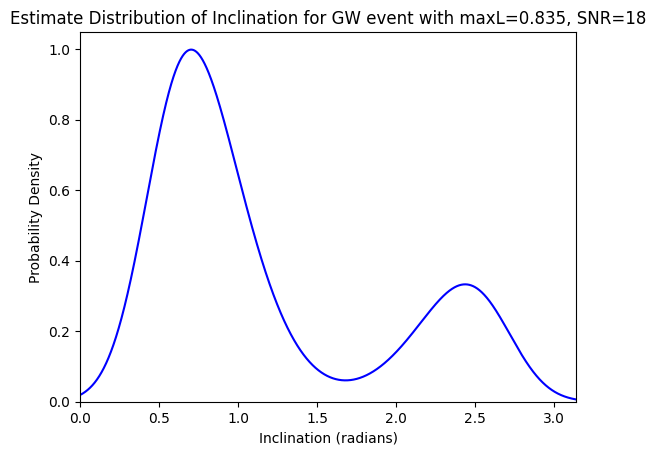

The process has taken 25.34876917599999s to complete.


In [ ]:
#Preliminary Importations
#Import libraries as needed
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import scipy
from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as stats
import time

#Preliminary Step
#Use code to check time elapsed for process to complete
time_start = time.perf_counter()

#Step 1
#Ask user what values they have for both the inclination angle and the SNR, as well as the normalisation factor (use to scale peaks)
measured_iota = input("Input the measured inclination: ")
measured_snr = input("Input the measured SNR: ")
norm_factor = input("Input the normalisation factor (value between 0 and 1, if unknown, submit 0.5): ")

#Step 2
#Import the names of all available events, as well as their associated inclinations of maximum likelihood, and the SNR of the detection
events = ['GW150914_095045', 'GW151012_095443', 'GW151226_033853', 'GW170104_101158', 'GW170608_020116', 'GW170729_185629', 'GW170809_082821',
          'GW170814_103043', 'GW170817_124104', 'GW170818_022509', 'GW170823_131358', 'GW190403_051519', 'GW190408_181802', 'GW190412_053044',
          'GW190413_052954', 'GW190413_134308', 'GW190421_213856', 'GW190425_081805', 'GW190426_190642', 'GW190503_185404', 'GW190512_180714',
          'GW190513_205428', 'GW190514_065416', 'GW190517_055101', 'GW190519_153544', 'GW190521_030229', 'GW190521_074359', 'GW190527_092055',
          'GW190602_175927', 'GW190620_030421', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457',
          'GW190719_215514', 'GW190720_000836', 'GW190725_174728', 'GW190727_060333', 'GW190728_064510', 'GW190731_140936', 'GW190803_022701',
          'GW190805_211137', 'GW190814_211039', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', 'GW190916_200658',
          'GW190917_114630', 'GW190924_021846', 'GW190925_232845', 'GW190926_050336', 'GW190929_012149', 'GW190930_133541', 'GW191103_012549',
          'GW191105_143521', 'GW191109_010717', 'GW191113_071753', 'GW191126_115259', 'GW191127_050227', 'GW191129_134029', 'GW191204_110529',
          'GW191204_171526', 'GW191215_223052', 'GW191216_213338', 'GW191219_163120', 'GW191222_033537', 'GW191230_180458', 'GW200105_162426',
          'GW200112_155838', 'GW200115_042309', 'GW200128_022011', 'GW200129_065458', 'GW200202_154313', 'GW200208_130117', 'GW200208_222617',
          'GW200209_085452', 'GW200210_092254', 'GW200216_220804', 'GW200219_094415', 'GW200220_061928', 'GW200220_124850', 'GW200224_222234',
          'GW200225_060421', 'GW200302_015811', 'GW200306_093714', 'GW200308_173609', 'GW200311_115853', 'GW200316_215756', 'GW200322_091133']

max_like_incl = np.array([2.369, 0.498, 0.287, 0.649, 1.883, 0.854, 2.607,
                          0.556, 3.078, 2.414, 2.937, 0.709, 0.785, 0.425,
                          1.644, 2.243, 2.684, 2.215, 0.815, 0.622, 3.088,
                          1.386, 1.999, 1.122, 1.949, 1.633, 2.656, 2.305,
                          1.645, 0.408, 0.540, 1.878, 0.664, 2.454, 2.537,
                          1.624, 0.694, 1.455, 0.491, 2.647, 0.742, 0.808,
                          2.441, 2.743, 2.735, 0.826, 0.394, 1.680, 1.121,
                          0.349, 0.835, 1.362, 0.542, 2.808, 1.397, 1.575,
                          1.753, 0.327, 1.872, 0.546, 0.502, 2.193, 1.065,
                          2.449, 0.436, 2.195, 0.335, 0.843, 0.156, 2.145,
                          2.607, 1.276, 1.299, 0.525, 2.331, 0.669, 1.489,
                          1.402, 1.192, 1.831, 0.389, 2.584, 2.977, 1.012,
                          2.477, 2.743])

snr_data = np.array([26.0,10.0,13.1,13.8,15.4,10.8,12.8,17.7,12.0,12.2,7.6,14.6,19.8,
                     9.0,10.6,10.7,8.7,12.2,12.7,12.5,8.0,10.8,15.9,14.3,25.9,8.0,13.2,
                     12.1,16.4,11.2,13.4,13.1,13.4,7.9,10.9,9.1,11.7,13.1,8.8,9.3,8.1,
                     25.3,16.5,10.2,14.5,13.1,8.1,8.3,12.0,9.7,8.1,9.7,9.7,8.9,9.7,17.3,
                     7.9,8.3,9.2,13.1,8.9,17.4,1.2,18.6,12.5,10.4,19.8,10.6,26.8,10.8,10.8,
                     7.4,9.6,8.4,8.1,10.7,7.2,8.5,20.0,12.5,10.8,7.8,4.7,17.8,10.3,4.5])

#Step 3
#Check whether the data files for all available events can be accessed, where those that can be accessed are downloaded
#If not, the event name will be removed from the above array
no_data = []
for i in range(len(events)):
  try:
    incl_file = f"wget -q https://raw.githubusercontent.com/gwtc/samples/refs/heads/main/{events[i]}/samples/C01:IMRPhenomXPHM/C01:IMRPhenomXPHM_iota.dat"
    incl = subprocess.run(incl_file, shell=True, check=True)
  except subprocess.CalledProcessError as e:
    no_data.append(events[i])

for i in range(len(events)-1, -1, -1):
  for j in range(len(no_data)):
    if events[i] == no_data[j]:
      events.pop(i)
      break

n = np.linspace(0, (len(events)-1), len(events))
def incl_dist(x, y):
  all_data = []
  data = []
  events = {}
  for i in range(len(x)):
    if i == 0:
      data = np.loadtxt(f'C01:IMRPhenomXPHM_iota.dat', dtype=float, skiprows=1)
      all_data.append(data)
    else:
      data = np.loadtxt(f'C01:IMRPhenomXPHM_iota.dat.{i}', dtype=float, skiprows=1)
      all_data.append(data)
  for i in range(len(y)):
    events[y[i]] = all_data[i]
  return events
inclination = incl_dist(n, events)

#Step 4
#Adjust the position of any inclination data point with a value to be within range 0 to pi/2 (radians)
#Apply this process to the inclinations of maximum likelihood as well
inclinations = {}
for event in events:
  inclinations[event] = []
  for i in range(len(inclination[event])):
    if inclination[event][i] > np.pi/2:
      adjusted = np.pi - inclination[event][i]
      inclinations[event].append(adjusted)
    else:
      inclinations[event].append(inclination[event][i])

max_like_incl_adjust = []
for i in range(len(max_like_incl)):
  if max_like_incl[i] > np.pi/2:
    max_like_incl_adjust.append(np.pi - max_like_incl[i])
  else:
    max_like_incl_adjust.append(max_like_incl[i])

#Step 5
#Define functions for a skewed Gaussian and a reciprocal function
#Define additional functions that help find the mean of a skewed Gaussian, revert back to the location, as well as to determine the parameters of a Gaussian function (location, scale, and shape)
#Define a double skewed Gaussian as well
def reciprocal(x, a, b):
  y = a*(1/x) + b
  return y

def skew_gauss(x, mu, sigma, alpha):
  return (2/sigma)*((1/(np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/(2*sigma**2)))*(1/2*(1+scipy.special.erf(alpha*((x-mu)/(sigma*np.sqrt(2))))))

def mean_skew_gau(mu, sigma, alpha):
  delta = (alpha)/np.sqrt(1+(alpha**2))
  m0 = mu + (np.sqrt(2/np.pi)*delta*sigma)
  return m0

def revert_mean_skew_gau(mean, sigma, alpha):
  delta = (alpha)/np.sqrt(1+(alpha**2))
  mu = mean - (np.sqrt(2/np.pi)*delta*sigma)
  return mu

def double_skew_gau(x, mu, sigma, alpha, norm_factor=0.5):
  mu2 = np.pi - mu
  return norm_factor*skew_gauss(x, mu, sigma, alpha) + (1-norm_factor)*skew_gauss(x, mu2, sigma, -alpha)

def find_para_iota(x):
  count, bins = np.histogram(inclinations[x], bins=200, density=True)
  bin_centres = 0.5*(bins[1:]+bins[:-1])
  p_guess = [np.mean(inclinations[x]), np.std(inclinations[x]), 1]
  bounds = ([-np.inf, 0, -10], [np.inf, np.inf, 10])
  popt, pcov = curve_fit(skew_gauss, bin_centres, count, p0=p_guess, maxfev=10000, bounds=bounds)
  mu_val, sigma_val, alpha_val = popt
  return mu_val, sigma_val, alpha_val

#Step 6
#Using the function to find the parameter values, create individual arrays for each parameter
mu_value = []
sigma_value = []
alpha_value = []
for event in events:
  mu, sigma, alpha = find_para_iota(event)
  mu_value.append(mu)
  sigma_value.append(sigma)
  alpha_value.append(alpha)

#Step 7
#Using the mean function, calculate the mean for each distribution
mean_skewgau = []
for i in range(len(mu_value)):
  mean = mean_skew_gau(mu_value[i], sigma_value[i], alpha_value[i])
  mean_skewgau.append(mean)

#Step 8
#For data whose residual is less than 0.3, determine the gradient and intercept values for conversion from inclination of maximum likelihood to mean
use_max_like_formean = []
use_mu_formean = []
for i in range(len(max_like_incl_adjust)):
  val = max_like_incl_adjust[i]
  diff = abs(val - mean_skewgau[i])
  if diff < 0.3:
    use_max_like_formean.append(max_like_incl_adjust[i])
    use_mu_formean.append(mean_skewgau[i])
  else:
    continue
slope, inter, _, _, _ = stats.linregress(use_max_like_formean, use_mu_formean)

#Step 9
#For SNR greater than 5, determine the gradient and intercept values for conversion from SNR to std dev (using a reciprocal fitting model)
use_snr_forstd = []
use_sigma_forstd = []
for i in range(len(snr_data)):
  if snr_data[i] > 5:
    use_snr_forstd.append(snr_data[i])
    use_sigma_forstd.append(sigma_value[i])
  else:
    continue
p_guess = [2, 1]
popt, _ = curve_fit(reciprocal, use_snr_forstd, use_sigma_forstd, p0=p_guess)

#Step 10
#For shape parameters whose values are greater than -4, determine the gradient and intercept values for conversion from maximum likelihood to shape parameter
use_max_like_forshape = []
use_alpha_forshape = []
for i in range(len(max_like_incl_adjust)):
  if alpha_value[i] > -4:
    use_max_like_forshape.append(max_like_incl_adjust[i])
    use_alpha_forshape.append(alpha_value[i])
  else:
    continue
slope2, inter2, _, _, _ = stats.linregress(use_max_like_forshape, use_alpha_forshape)

#Step 11
#Redefine the gradient and intercept of all fits such that they are more identifiable
slope_mean = slope
intercept_mean = inter

slope_sigma = popt[0]
intercept_sigma = popt[1]

slope_shape = slope2
intercept_shape = inter2

#Step 12
#Generate an array that extends between the range of possible inclination angles
incl_array = np.linspace(0, np.pi, 10000)

#Step 13
#Use the inputted values for maximum likelihood inclination, SNR, and normalisation factor to reproduce the estimated curve
test_sigma = slope_sigma/float(measured_snr) + intercept_sigma
test_shape = slope_shape*float(measured_iota) + intercept_shape
intermediate_test_mean = slope_mean*float(measured_iota) + intercept_mean
test_mean = revert_mean_skew_gau(intermediate_test_mean, test_sigma, test_shape)
norm_factor = float(norm_factor)
prob_dens = double_skew_gau(incl_array, test_mean, test_sigma, test_shape, norm_factor)
plt.plot(incl_array, prob_dens, 'b-')
plt.xlabel('Inclination (radians)')
plt.ylabel('Probability Density')
plt.title(f'Estimate Distribution of Inclination for GW event with maxL={measured_iota}, SNR={measured_snr}')
plt.xlim(0, np.pi)
plt.ylim(bottom=0)
plt.show()

#Final Step
#Conclude the timing of the code, print the result
time_finish = time.perf_counter()
duration = time_finish - time_start
print(f'The process has taken {duration}s to complete.')